## ANN for the Titanic Dataset
In this experiment we use an ANN to predict survivors of the Titanic incident. The data is provided by Kaggle.com. 

The purpose of the experiment is primarily to understand the impact of layers and neurons on accuracy of ANNs. Also, we capture the time to fit the models. The fit times are important for production models. 

The experiment will include 4 ANNs; 2 with 1 hidden layer and 2 with 2 hidden layers. The layer breakdowns are as follows for the first 2 models: input layer - 16 neurons, hidden layer - 8 neurons; for the second pair of models: input layer - 32 neurons, hidden layer - 16 neurons. This is a binary classification problem - the output layer includes 1 neuron. The second model in each pair of models will include 2 hidden layers.

## Data Preprocessing

In [0]:
# import base packages into the namespace for this program
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from timeit import default_timer as timer
from google.colab import files
# modeling routines from Scikit Learn packages
import keras
from keras.layers import Dense
from keras.models import Sequential

In [449]:
# upload the data into colab
uploaded = files.upload()

Saving train.csv to train (3).csv


In [0]:
# read in the datasets
data = pd.read_csv('train.csv')

In [451]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [452]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [453]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [454]:
data.groupby(['Sex','Pclass']).median()

PassengerId  Survived   Age  SibSp  Parch      Fare
Sex    Pclass                                                     
female 1             447.0       1.0  35.0    0.0    0.0  82.66455
       2             439.5       1.0  28.0    0.0    0.0  22.00000
       3             376.0       0.5  21.5    0.0    0.0  12.47500
male   1             480.5       0.0  40.0    0.0    0.0  41.26250
       2             416.5       0.0  30.0    0.0    0.0  13.00000
       3             466.0       0.0  25.0    0.0    0.0   7.92500

In [0]:
# replace null ages based on medians by sex and class
data['Age'] = data.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

In [456]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [0]:
# drop the 2 instances of null values for Embarked, this is an insignificant # of instances
data = data.dropna(subset=['Embarked'])

In [0]:
# Importing LabelEncoder from Sklearn
from sklearn.preprocessing import LabelEncoder
label_encoder_sex = LabelEncoder()

In [0]:
# Transforming sex column values using label Encoder
data['Sex'] = label_encoder_sex.fit_transform(data['Sex'])

In [0]:
# create dummy variables for the Embarked variable which is nominal
data = pd.concat([data, pd.get_dummies(data['Embarked'])], axis=1)

In [461]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0,0,1


In [0]:
RandomSeed = 0
# create the X and y data for train_test_split
X = data[['Pclass','Sex','Age','SibSp','Parch','C','Q','S']].to_numpy(copy = True)
y = data['Survived'].to_numpy(copy = True)

In [0]:
# implement train/test/split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = RandomSeed)

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Model 1

In [465]:
# create model 1
model1 = Sequential()
model1.add(Dense(units=16, activation='relu', input_dim=8))
model1.add(Dense(units=8, activation='relu'))
model1.add(Dense(units=1, activation='sigmoid'))
model1.summary()

Model: "sequential_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_237 (Dense)            (None, 16)                144       
_________________________________________________________________
dense_238 (Dense)            (None, 8)                 136       
_________________________________________________________________
dense_239 (Dense)            (None, 1)                 9         
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


In [466]:
# compile and fit model 1
model1.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
start1 = timer()
model1.fit(X_train, y_train, batch_size=10, epochs=100, verbose=False, validation_split=.1, validation_data=(X_test, y_test))
end1 = timer()
model1_train_time = (end1 - start1)
print('Model 1 train time:', model1_train_time)

Model 1 train time: 22.867687030000525


In [0]:
# create history object for visualization
history1 = model1.fit(X_train, y_train, batch_size=10, epochs=100, verbose=False, validation_split=.1, validation_data=(X_test, y_test))

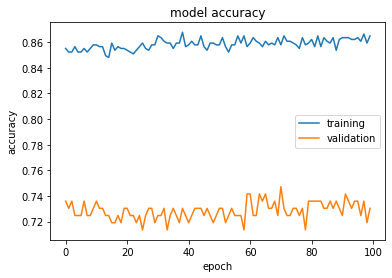

In [468]:
# visualize training/validation performance
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

In [469]:
# summary of model performance
train_score1 = model1.evaluate(X_train, y_train, verbose=0)
print('Train loss:', train_score1[0])
print('Train accuracy:', train_score1[1])
test_score1 = model1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', test_score1[0])
print('Test accuracy:', test_score1[1])

Train loss: 0.3370399182523521
Train accuracy: 0.8635724332765184
Test loss: 0.6333851566475429
Test accuracy: 0.7303370779819702


## Model 2

In [470]:
# create model 2
model2 = Sequential()
model2.add(Dense(units=16, activation='relu', input_dim=8))
model2.add(Dense(units=8, activation='relu'))
model2.add(Dense(units=8, activation='relu'))
model2.add(Dense(units=1, activation='sigmoid'))
model2.summary()

Model: "sequential_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_240 (Dense)            (None, 16)                144       
_________________________________________________________________
dense_241 (Dense)            (None, 8)                 136       
_________________________________________________________________
dense_242 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_243 (Dense)            (None, 1)                 9         
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


In [471]:
# compile and fit model 2
model2.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
start2 = timer()
model2.fit(X_train, y_train, batch_size=10, epochs=100, verbose=False, validation_split=.1, validation_data=(X_test, y_test))
end2 = timer()
model2_train_time = (end2 - start2)
print('Model 2 train time:', model2_train_time)

Model 2 train time: 23.609449030998803


In [0]:
# create history object
history2 = model2.fit(X_train, y_train, batch_size=10, epochs=100, verbose=False, validation_split=.1, validation_data=(X_test, y_test))

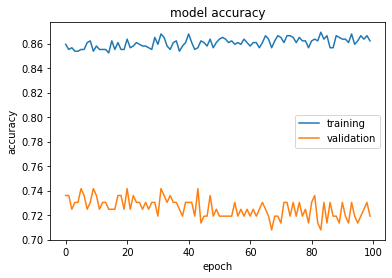

In [473]:
# visualize training/validation performance
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

In [474]:
# summary of model performance
train_score2 = model2.evaluate(X_train, y_train, verbose=0)
print('Train loss:', train_score2[0])
print('Train accuracy:', train_score2[1])
test_score2 = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', test_score2[0])
print('Test accuracy:', test_score2[1])

Train loss: 0.33396697991675633
Train accuracy: 0.869198312320119
Test loss: 0.6658559207166179
Test accuracy: 0.7191011249349358


## Model 3

In [475]:
# create model 3
model3 = Sequential()
model3.add(Dense(units=32, activation='relu', input_dim=8))
model3.add(Dense(units=16, activation='relu'))
model3.add(Dense(units=1, activation='sigmoid'))
model3.summary()

Model: "sequential_62"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_244 (Dense)            (None, 32)                288       
_________________________________________________________________
dense_245 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_246 (Dense)            (None, 1)                 17        
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


In [476]:
# compile and fit model 3
model3.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
start3 = timer()
model3.fit(X_train, y_train, batch_size=10, epochs=100, verbose=False, validation_split=.1, validation_data=(X_test, y_test))
end3 = timer()
model3_train_time = (end3 - start3)
print('Model 3 train time:', model3_train_time)

Model 3 train time: 23.409910950998892


In [0]:
# create history object
history3 = model3.fit(X_train, y_train, batch_size=10, epochs=100, verbose=False, validation_split=.1, validation_data=(X_test, y_test))

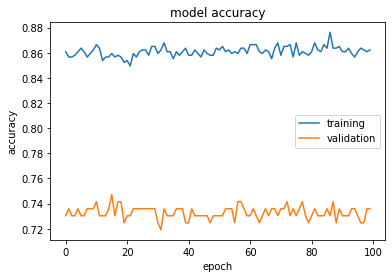

In [478]:
# visualize training/validation performance
plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

In [479]:
# summary of model performance
train_score3 = model3.evaluate(X_train, y_train, verbose=0)
print('Train loss:', train_score3[0])
print('Train accuracy:', train_score3[1])
test_score3 = model3.evaluate(X_test, y_test, verbose=0)
print('Test loss:', test_score3[0])
print('Test accuracy:', test_score3[1])

Train loss: 0.32989570309844196
Train accuracy: 0.8607594937547182
Test loss: 0.6548260115505604
Test accuracy: 0.7359550548403451


## Model 4

In [480]:
# create model 4
model4 = Sequential()
model4.add(Dense(units=32, activation='relu', input_dim=8))
model4.add(Dense(units=16, activation='relu'))
model4.add(Dense(units=16, activation='relu'))
model4.add(Dense(units=1, activation='sigmoid'))
model4.summary()

Model: "sequential_63"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_247 (Dense)            (None, 32)                288       
_________________________________________________________________
dense_248 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_249 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_250 (Dense)            (None, 1)                 17        
Total params: 1,105
Trainable params: 1,105
Non-trainable params: 0
_________________________________________________________________


In [481]:
# compile and fit model 4
model4.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
start4 = timer()
model4.fit(X_train, y_train, batch_size=10, epochs=100, verbose=False, validation_split=.1, validation_data=(X_test, y_test))
end4 = timer()
model4_train_time = (end4 - start4)
print('Model 4 train time:', model4_train_time)

Model 4 train time: 24.560107530000096


In [0]:
# create history object
history4 = model4.fit(X_train, y_train, batch_size=10, epochs=100, verbose=False, validation_split=.1, validation_data=(X_test, y_test))

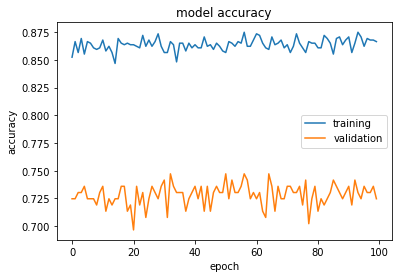

In [483]:
# visualize training/validation performance
plt.plot(history4.history['acc'])
plt.plot(history4.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

In [484]:
# summary of model performance
train_score4 = model4.evaluate(X_train, y_train, verbose=0)
print('Train loss:', train_score4[0])
print('Train accuracy:', train_score4[1])
test_score4 = model4.evaluate(X_test, y_test, verbose=0)
print('Test loss:', test_score4[0])
print('Test accuracy:', test_score4[1])

Train loss: 0.3115187861999882
Train accuracy: 0.8720112518419193
Test loss: 0.6424677244732889
Test accuracy: 0.7247190997841653


## Summary

In [485]:
# Create dataframe of results
mod1stats = {'# hidden layers': 1, 'Nodes input layer': 16, 'Nodes per hidden layer': 8, 
             'Train Time': model1_train_time, 'Test Accuracy': test_score1[1], 'Test Loss': test_score1[0]}
mod2stats = {'# hidden layers': 2, 'Nodes input layer': 16, 'Nodes per hidden layer': 8,
             'Train Time': model2_train_time, 'Test Accuracy': test_score2[1], 'Test Loss': test_score2[0]}
mod3stats = {'# hidden layers': 1, 'Nodes input layer': 32, 'Nodes per hidden layer': 16,
             'Train Time': model3_train_time, 'Test Accuracy': test_score3[1], 'Test Loss': test_score3[0]}
mod4stats = {'# hidden layers': 2, 'Nodes input layer': 32, 'Nodes per hidden layer': 16,
             'Train Time': model4_train_time, 'Test Accuracy': test_score4[1], 'Test Loss': test_score4[0]}
df = pd.DataFrame.from_dict([mod1stats, mod2stats, mod3stats, mod4stats])
index = pd.Index(['Model 1', 'Model 2', 'Model 3', 'Model 4'])
df.index = index
df

,# hidden layers,Nodes input layer,Nodes per hidden layer,Train Time,Test Accuracy,Test Loss
Model 1,1,16,8,22.867687,0.730337,0.633385
Model 2,2,16,8,23.609449,0.719101,0.665856
Model 3,1,32,16,23.409911,0.735955,0.654826
Model 4,2,32,16,24.560108,0.724719,0.642468


## Conclusion
Based on the results, more layers does not equate to improved accuracy. However, more neurons does, in this scenario. Other experiments were conducted with increased neurons and inconsistent results, those experiments are not included in this document. For fit times, the layers and neurons both affect times. 

An inconsistent observation is the increased loss between models 1 and 2 as opposed to models 3 and 4. Loss increased in model 2 but decreased in model 4. Further exploration of nodes vs layers should be considered. 

A key observation is that all models are overfitting. To reduce this in future experiments, drop layers as well as regularization methods should be included for comparison.